# #2020Census

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
frames = []
for m in range(1,6):
    temp_df = pd.read_csv(f"data/census_tweets_month_{m}.csv",parse_dates=["date"])
    frames.append(temp_df)

In [3]:
df = pd.concat(frames).sort_values(by=['date'])
print(df.shape)
df.head()

(118229, 11)


,id,timestamp,username,text,hashtags,geo,retweets,favorites,mentions,to,date
10143,1.212480e+18,2020-01-01 21:05:29+00:00,CountTheNation,$800 BILLION WHO!? WHAT!? The more people cou...,#ThisisUS #StandUpBeCounted #2020Census #Every...,NaN,0,2,@ColorOfChange @NALEO @uscensusbureau,NaN,2020-01-01
10162,1.212449e+18,2020-01-01 19:00:56+00:00,WakeGOV,#HappyNewYear! The #2020Census is closer than ...,#HappyNewYear #2020Census #Census101 #WakeCounts,NaN,2,3,NaN,NaN,2020-01-01
10163,1.212448e+18,2020-01-01 19:00:02+00:00,CAPOrangeCounty,¡Es oficialmente el 2020! ¡Su primer meta del ...,#CENSO2020 #CENSO2020 #OCCuenta2020 #NewYear #...,NaN,2,1,NaN,NaN,2020-01-01
10164,1.212448e+18,2020-01-01 18:59:48+00:00,AlabamaCounts,The #2020Census is almost here. We are ready f...,#2020Census,NaN,3,1,NaN,uscensusbureau,2020-01-01
10165,1.212446e+18,2020-01-01 18:51:59+00:00,JeffWice,NY projected to lose 1 congressional district ...,#2020Census,NaN,2,2,@mandy_fries @timesunion @NYLawSchool @NYElect...,NaN,2020-01-01


## Tweets per day

In [4]:
grouped = df.groupby("date")

In [5]:
df_grouped=pd.DataFrame({"tweets": grouped["id"].count(),"unique_users": grouped["username"].nunique()})
df_grouped

,tweets,unique_users
date,,
2020-01-01,117,108
2020-01-02,188,178
2020-01-03,180,155
2020-01-04,111,83
2020-01-05,72,67
...,...,...
2020-05-04,1031,858
2020-05-05,926,759
2020-05-06,946,791


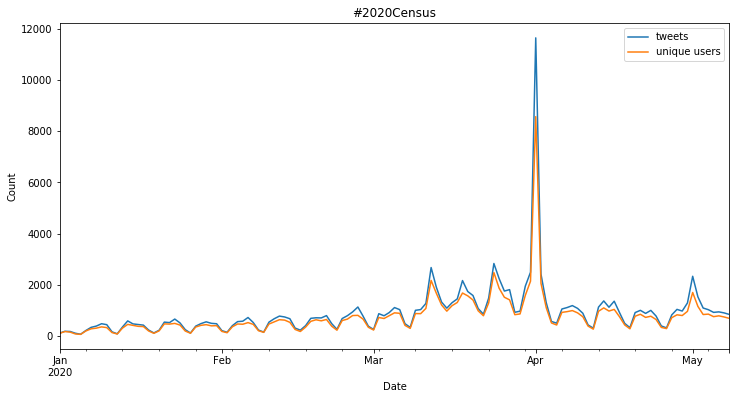

In [6]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

df_grouped.tweets.plot(style='-', label="tweets",ax=ax)
df_grouped.unique_users.plot(style="-",label="unique users",ax=ax)

ax.set_xlabel("Date")
ax.set_ylabel("Count")

ax.set_title("#2020Census")
plt.legend();

Days with more tweets:

In [7]:
df_grouped.sort_values(["tweets"], ascending=False)["tweets"].iloc[:5]

date
2020-04-01    11647
2020-03-24     2835
2020-03-12     2677
2020-03-31     2495
2020-04-02     2422
Name: tweets, dtype: int64

## Tweets per month

In [8]:
grouped_m = df.groupby(df['date'].dt.strftime('%m'))
df_grouped_m =pd.DataFrame({"tweets": grouped_m["id"].count(),"unique_users": grouped_m["username"].nunique()})
df_grouped_m

,tweets,unique_users
date,,
01,10730,5016
02,16334,7403
03,42805,22632
04,38742,18209
05,9618,4968


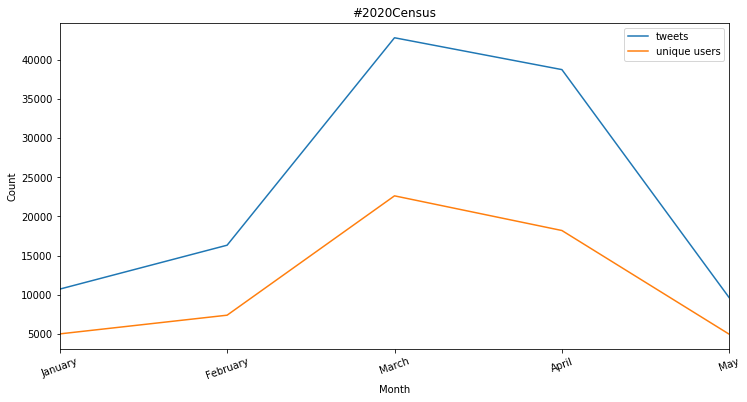

In [9]:
import calendar
fig, ax = plt.subplots(1,1,figsize=(12,6))

df_grouped_m.tweets.plot(style='-', label="tweets",ax=ax)
df_grouped_m.unique_users.plot(style="-",label="unique users",ax=ax)

ax.set_xlabel("Month")
ax.set_ylabel("Count")

ax.set_title("#2020Census")
plt.xticks(np.arange(5), calendar.month_name[1:6], rotation=20)
plt.legend();